# TP SVM

In [33]:
import sklearn

sklearn.__version__

'0.20.2'

In [44]:
import numpy as np
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

<Figure size 800x480 with 0 Axes>

In [3]:
def Risk(Y_pred,Y_true):
    risk = np.sum((Y_pred - Y_true) ** 2) / Y_true.shape[0]
    return risk

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

In [7]:
iris.data.shape

(150, 4)

## Question 1

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=1)
X_train.shape

(50, 2)

In [13]:
svm_linear = svm.LinearSVC(verbose=1)
svm_linear.fit(X_train,y_train)
print('SVM linear mean accuracy = ',svm_linear.score(X_test,y_test))
ypred = svm_linear.predict(X_test)
Risk(ypred,y_test)

[LibLinear]SVM linear mean accuracy =  0.52


D:\program_files\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.48

## Question 2

In [17]:
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train,y_train)
print('SVM polinomial mean accuracy = ',svm_poly.score(X_test,y_test))

SVM polinomial mean accuracy =  0.6


D:\program_files\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


We can see that the polynomial kernel is slightly better in mean accuracy. However, this depends too much on the random seed on the train test split

## Question 3

$$\arg \min_{w\in\mathcal{H},w_0\in\mathbb{R},\xi\in\mathbb{R^{n}}}\ {\frac{1}{2}\sum_{j=1}^{m}w_{j}^{2}+C\sum_{i=1}^{n}\xi_{i}},\quad \xi_{i} \geq 0, \forall i\in \left\{1,...,n\right\}, \xi_{i} \geq 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0), \forall i\in \left\{1,...,n\right\}$$
$$=\arg \min_{w\in\mathcal{H},w_0\in\mathbb{R}}\
{\left(\arg \min_{\xi\in\mathbb{R^{n}}}\
{\frac{1}{2}\sum_{j=1}^{m}w_{j}^{2}+C\sum_{i=1}^{n}\xi_{i}}\right)},\quad \xi_{i} \geq 0, \forall i\in \left\{1,...,n\right\}, \xi_{i} \geq 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0), \forall i\in \left\{1,...,n\right\}$$
$$ \forall i\in \left\{1,...,n\right\}, \xi_{i} \geq 0, \xi_{i} \geq 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0), \quad donc \quad \xi_{i} \geq \max(0, 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0)) $$
Thus, $$ \arg \min_{\xi\in\mathbb{R^{n}}}\ {\frac{1}{2}\sum_{j=1}^{m}w_{j}^{2}+C\sum_{i=1}^{n}\xi_{i}} = \frac{1}{2}\sum_{j=1}^{m}w_{j}^{2}+C\sum_{i=1}^{n}\max(0, 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0)) $$
And finally, $$\arg \min_{w\in\mathcal{H},w_0\in\mathbb{R},\xi\in\mathbb{R^{n}}}\ {\frac{1}{2}\sum_{j=1}^{m}w_{j}^{2}+C\sum_{i=1}^{n}\xi_{i}},\quad \xi_{i} \geq 0, \forall i\in \left\{1,...,n\right\}, \xi_{i} \geq 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0), \forall i\in \left\{1,...,n\right\}$$
$$=\arg \min_{w\in\mathcal{H},w_0\in\mathbb{R}}\
{\frac{1}{2}\sum_{j=1}^{m}w_{j}^{2}+C\sum_{i=1}^{n}\max(0, 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0))}$$
$$=\arg \min_{w\in\mathcal{H},w_0\in\mathbb{R}}\
{\frac{1}{2}||\mathbf{w}||^2+C\sum_{i=1}^{n}[0, 1-y_{i}(\langle\mathbf{w},\Phi(\mathbf{x_i}\rangle+w_0)]_{+}}$$

## Question 4

This happens because the Hinge Loss is always greater or equals than the 0-1 loss, and as it is convex, we can optimize it.

## SVM GUI

We can see that, as we reduce C value, the margin starts to accomodate more dots, because the model is not very wooried to minimize the error to many points.

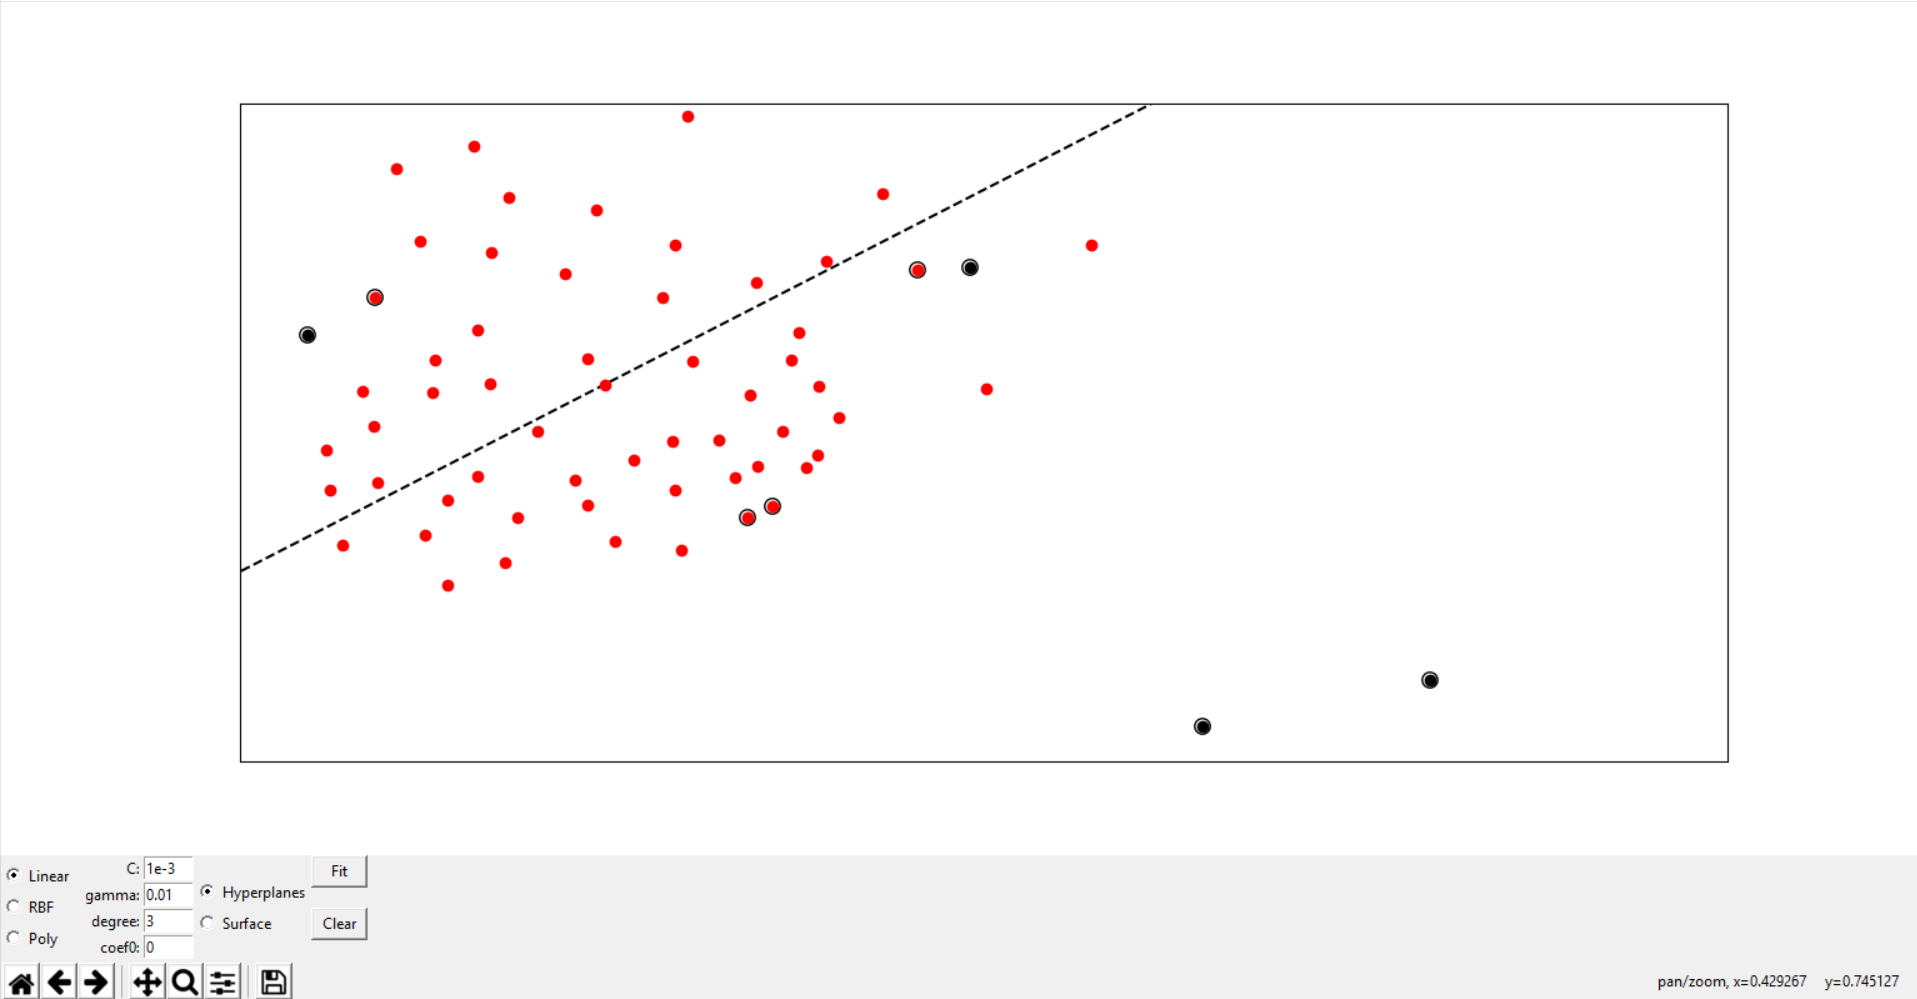

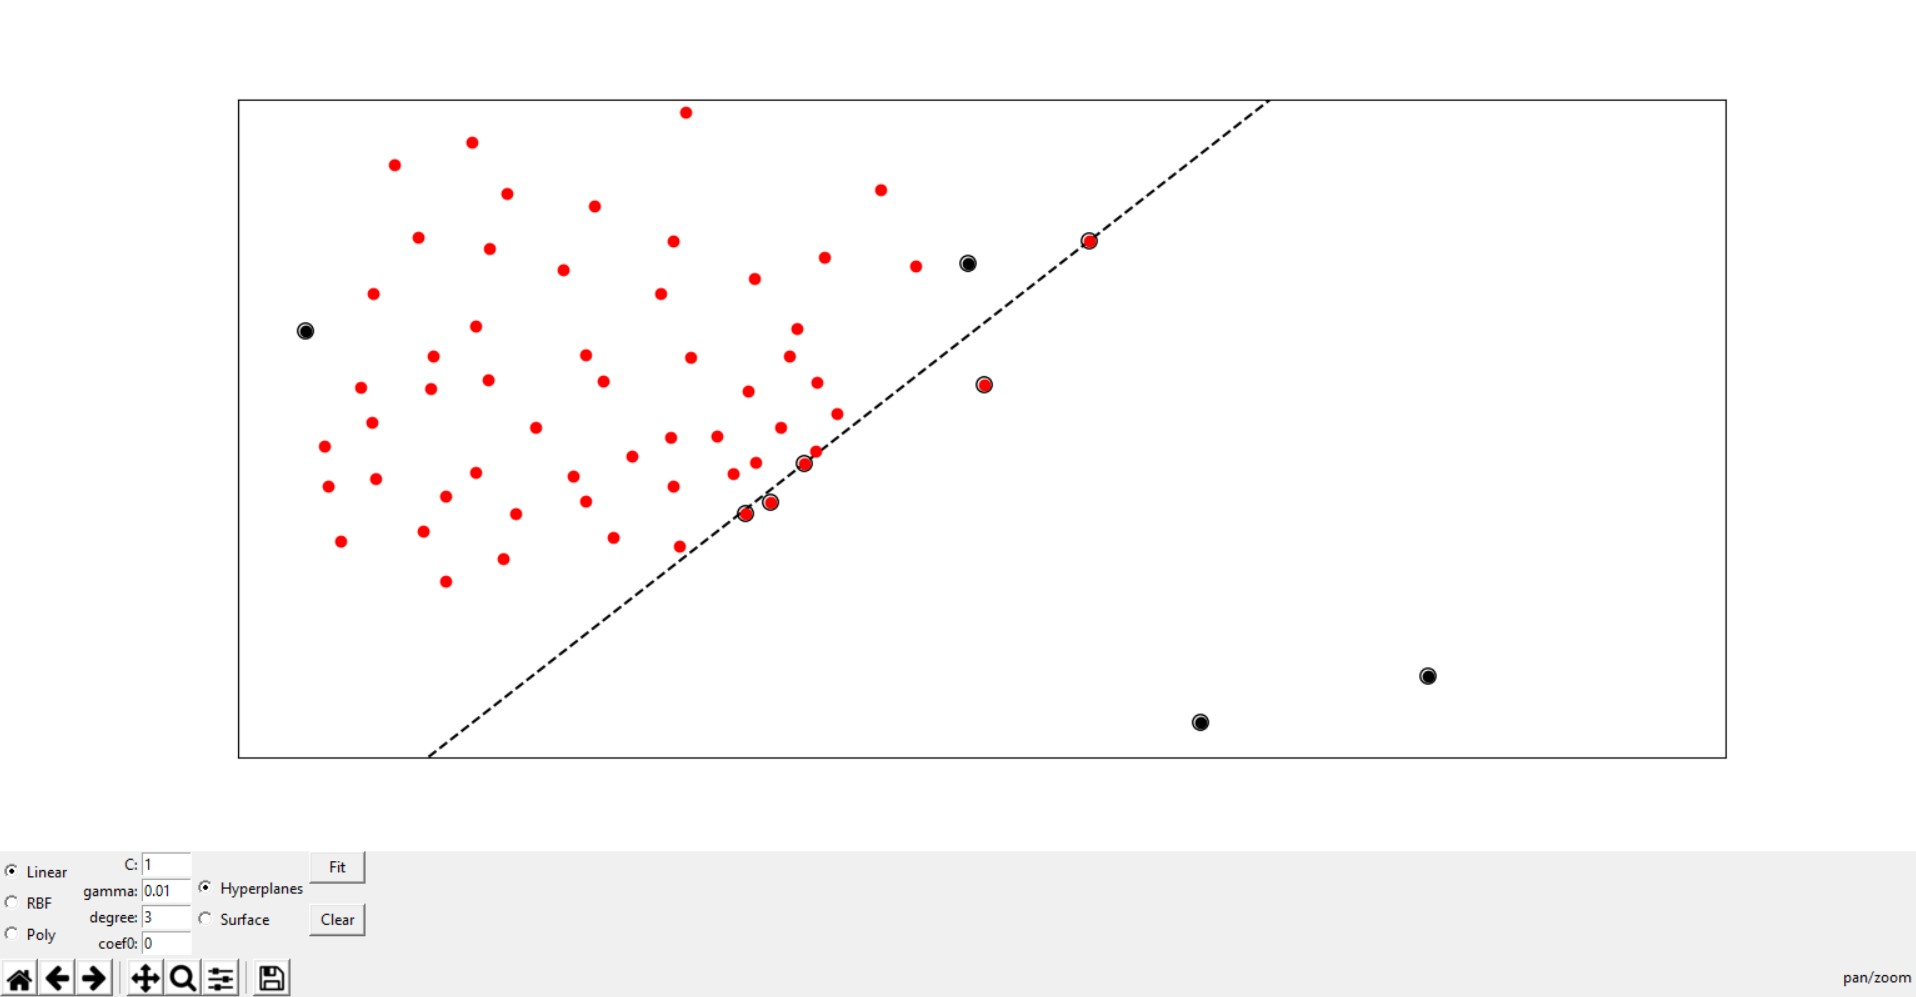

## Question 5


In [18]:
lfw_dataset = datasets.fetch_lfw_people()


X = lfw_dataset.data
y = lfw_dataset.target

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [ ]:
C = np.logspace(-5,5)
svm_poly = svm.SVC(kernel='linear',verbose=1)
svm_poly.fit(X_train,y_train)
print('SVM linear mean accuracy = ',svm_poly.score(X_test,y_test))

[LibSVM]

In [12]:
###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl

from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()
target_names

['Ariel Sharon',
 'Colin Powell',
 'Donald Rumsfeld',
 'George W Bush',
 'Gerhard Schroeder',
 'Hugo Chavez',
 'Tony Blair']

In [13]:
####################################################################
# Pick a pair to classify such as
# names = ['Tony Blair', 'Colin Powell']
names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]


####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()

Fitting the classifier to the training set


In [6]:
#QUESTION 5 : TODO : try various values for C in the SVC function and plot the error curve

C = np.logspace(-5,5)

pred_err = []

for i in range(C.shape[0]):
    clf = svm.SVC(C=C[i],kernel='linear',verbose=1)
    clf.fit(X_train,y_train)
    pred_err.append(1 - clf.score(X_test,y_test))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

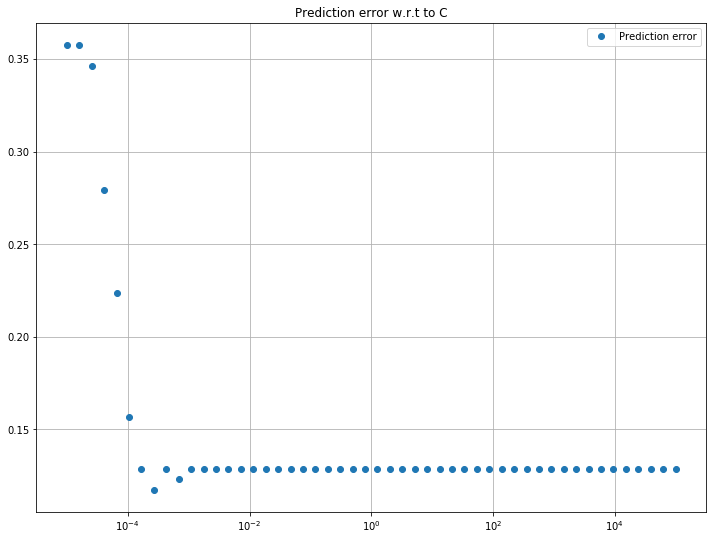

In [26]:
plt.semilogx(C,pred_err,'o',label='Prediction error')
plt.grid(True)
plt.title('Prediction error w.r.t to C')
plt.legend()
plt.show()

## Question 6

In [41]:
print('Best accuracy = ',1- pred_err[7])

Best accuracy =  0.9050279329608939


In [30]:
X_train_noisy = np.hstack((X_train,np.random.rand(X_train.shape[0],10000)))
X_test_noisy = np.hstack((X_test,np.random.rand(X_test.shape[0],10000)))
clf = svm.SVC(C=C[7],kernel='linear',verbose=1)
clf.fit(X_train_noisy,y_train)
print('SVM linear mean accuracy = ',clf.score(X_test_noisy,y_test))

[LibSVM]SVM linear mean accuracy =  0.8770949720670391


## Question 7

This helps to have a better control of your results, since you can verify if your intercept is near to zero. If it is, then a good fit was made.

## Question 8

In [48]:
C = np.logspace(-5,5,num=10)
gamma = C

dict = {
    'C': C,
    'gamma': gamma
}
rbf = svm.SVC(kernel='rbf')
gs = GridSearchCV(estimator=rbf,param_grid=dict, n_jobs=-1,cv=5,verbose=1)

In [69]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished
D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]), 'gamma': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [70]:
gs.best_params_

{'C': 46.41588833612782, 'gamma': 1e-05}

In [90]:
print('Accuracy without PCA  = ',gs.best_estimator_.score(X_test,y_test))

Accuracy without PCA  =  0.8938547486033519


We can see that the RBF kernel is a little bit worse than the linear kernel, 0.89 against 0.90

### PCA

In [64]:
gs.fit(Xpca_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]), 'gamma': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [65]:
gs.best_params_

{'C': 46.41588833612782, 'gamma': 1e-05}

In [67]:
print('Accuracy with PCA  = ',gs.best_estimator_.score(Xpca_test,y_test))

Accuracy withou PCA  =  0.5921787709497207


In [63]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized',n_components=178, random_state=2)

Xpca_train = pca.fit_transform(X_train)
Xpca_test = pca.fit_transform(X_test)

rbf2 = svm.SVC(kernel='rbf',C = 46.41588833612782,gamma=1e-5)
rbf2.fit(Xpca_train,y_train)
rbf2.score(Xpca_test,y_test)

0.5921787709497207

We can see that the random PCA was actually much worse to the accuracy. That might have happened likely because of the loss of explained variance losing plenty of variables, since this method gets the min(n_samples,n_variables), and we have not even 20 % of data samples compared to the number of features.

## Question 9

In [83]:
best_clf = svm.SVC(kernel='linear',C=46.41588833612782)
best_clf.fit(X_train,y_train)

best_clf.score(X_test,y_test)



0.9162011173184358

In [89]:
sum_alpha = np.sum(best_clf.dual_coef_)

sum2 = 0
for i in range(best_clf.dual_coef_.shape[1]):
    for j in range(best_clf.dual_coef_.shape[1]):
        sum2 += best_clf.dual_coef_[0][i]*best_clf.dual_coef_[0][j]*y_train[i]*y_train[j]*(X_train[i] @ X_train[j])

dual_val = sum_alpha - .5 * sum2
dual_val

-0.029460866306019025

In [88]:
best_clf.dual_coef_.shape


(1, 114)

## Image visualization

Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.260s
Chance level : 0.6610644257703081
Accuracy : 0.9162011173184358


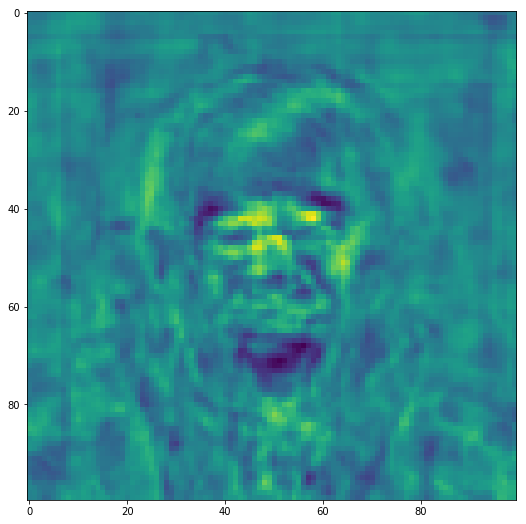

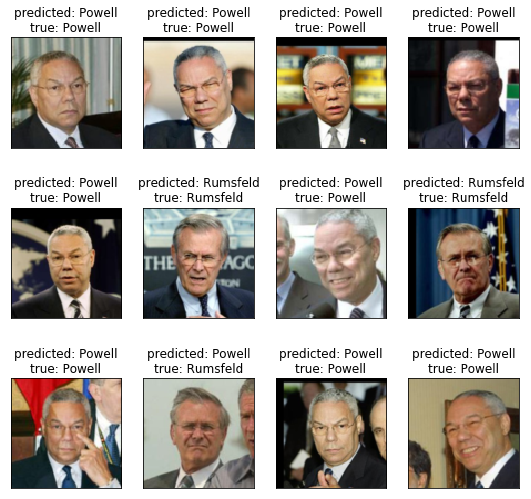

In [77]:

print ("Fitting the classifier to the training set")
t0 = time()
clf = SVC(kernel='linear', C=1.0)
clf = clf.fit(X_train, y_train)
print ("Predicting the people names on the testing set")
t0 = time()
y_pred = clf.predict(X_test)
print ("done in %0.3fs" % (time() - t0))
print ("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print ("Accuracy : %s" % clf.score(X_test, y_test))
####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))
####################################################################
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    6
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
    hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())
def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue: %s' % (pred_name, true_name)
prediction_titles = [title(y_pred[i], y_test[i], names)
for i in range(y_pred.shape[0])]
plot_gallery(images_test, prediction_titles)
pl.show()


In [79]:
clf.coef_.shape

(1, 10000)